<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Logistic_Regression_Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Python - 8: Logistic Regression (Binary Classification)

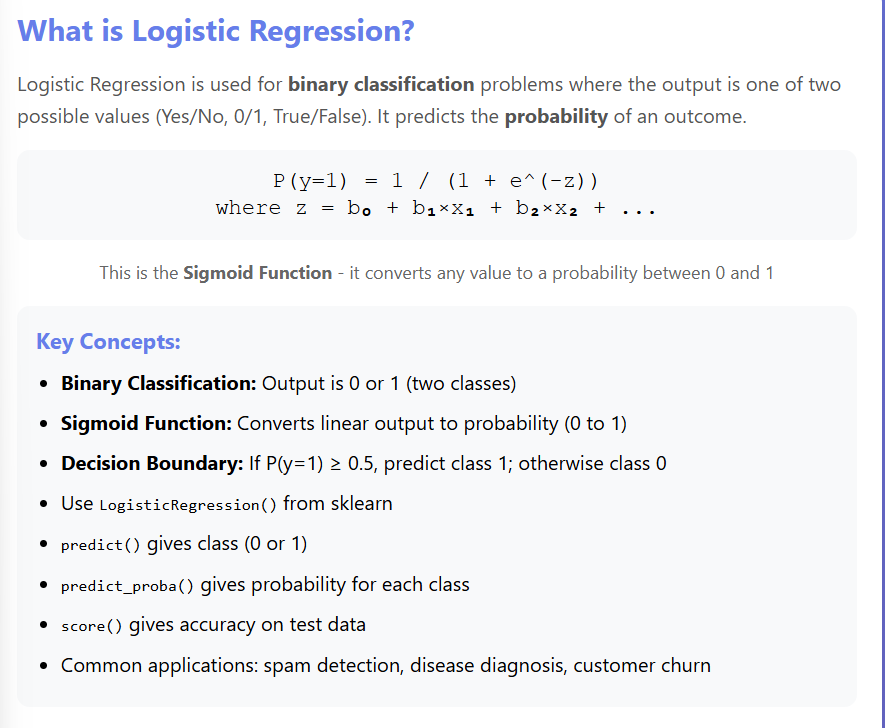

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


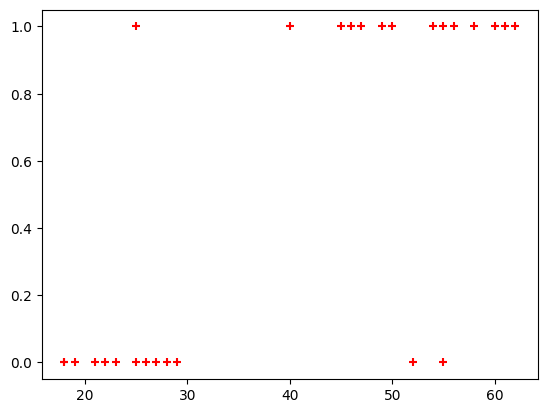

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
df.shape

(27, 2)

In [7]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['age']],df['bought_insurance'],test_size=0.1)

In [21]:
from sklearn.linear_model import  LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
X_test

,age
8,62
26,23
1,25


In [27]:
model.predict(X_test)

array([1, 0, 0])

In [28]:
model.predict_proba(X_test)

array([[0.04779143, 0.95220857],
       [0.87177836, 0.12822164],
       [0.84091421, 0.15908579]])

In [24]:
Y_test

,bought_insurance
8,1
26,0
1,0


In [25]:
model.score(X_test,Y_test)

1.0



---



---



---

# Exercise

Predict whether a person will buy insurance based on their age. Data: Age [22, 25, 47, 52, 46], Bought Insurance [0, 0, 1, 0, 1]. Build a model and predict for age 35.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.DataFrame({
    'age': [22, 25, 47, 52, 46],
    'bought_insurance': [0, 0, 1, 0, 1]
})

In [29]:
model=LogisticRegression()
X=df[['age']]
Y=df.bought_insurance
model.fit(X,Y)

LogisticRegression()

In [37]:
probability=model.predict_proba([[35]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
prediction=model.predict([[35]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
print(f"Will buy insurance: {prediction[0]}")
print(f"Probability: {probability[0][0]}")
print(f'Model coefficient: {model.coef_[0][0]}')

Will buy insurance: 0
Probability: 0.6274987078182386
Model coefficient: 0.13546543148122855


Email spam detection. Predict if an email is spam based on word count and link count. Data: Word count [50, 100, 200, 150, 300], Link count [2, 1, 5, 3, 8], Is spam [0, 0, 1, 0, 1]. Split data 80/20, train model, and evaluate accuracy. Predict for: 180 words, 4 links.

In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.DataFrame({
    'word_count': [50, 100, 200, 150, 300],
    'link_count': [2, 1, 5, 3, 8],
    'is_spam': [0, 0, 1, 0, 1]
})


In [49]:
X=df[['word_count','link_count']]
Y=df['is_spam']

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_test

,word_count,link_count
1,100,1


In [57]:
type(df['word_count'][0])

numpy.int64

In [65]:
model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [66]:
model.predict([[180,4]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [67]:
model.predict_proba([[180,4]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.25249115, 0.74750885]])

In [63]:
model.score(X_test,Y_test)

1.0

Disease diagnosis with missing data. Predict disease presence based on: Age [45, 50, 35, 60, NaN, 55], Blood pressure [130, 140, 120, NaN, 145, 135], Disease [0, 1, 0, 1, 1, 1]. Fill missing values with median, split 70/30, train, evaluate, and predict for: age 42, BP 128.

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.DataFrame({
    'age': [45, 50, 35, 60, np.nan, 55],
    'blood_pressure': [130, 140, 120, np.nan, 145, 135],
    'has_disease': [0, 1, 0, 1, 1, 1]
})

In [73]:
df['blood_pressure'].fillna(df['blood_pressure'].median(),inplace=True)

/tmp/ipython-input-2217863710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['blood_pressure'].fillna(df['blood_pressure'].median(),inplace=True)


In [75]:
df['age']=df['age'].fillna(df['age'].median())

In [76]:
df

,age,blood_pressure,has_disease
0,45.0,130.0,0
1,50.0,140.0,1
2,35.0,120.0,0
3,60.0,135.0,1
4,50.0,145.0,1
5,55.0,135.0,1


In [77]:
X=df[['age','blood_pressure']]
Y=df['has_disease']

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [91]:
model=LogisticRegression()
model.fit(X_train,Y_train)
model.predict([[42,128]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [92]:
prob=model.predict_proba([[42,128]])
prob

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.61154136, 0.38845864]])

In [94]:
print(f"Model score:{model.score(X_test,Y_test)}")
print(f'Disease probability:{prob[0][1]}')

Model score:0.5
Disease probability:0.38845864425698473


Understanding the sigmoid function. Write a function to calculate the sigmoid manually using the formula: 1 / (1 + e^(-z)). Then verify it matches sklearn's predictions by calculating z = b₀ + b₁×x₁ + b₂×x₂ and applying sigmoid. Use age=40, income=50000 with coefficients: b₀=-2.5, b₁=0.05, b₂=0.00003.

In [98]:
import math

# Define sigmoid function
def sigmoid(z):
    return (1/(1+math.exp(-z)))

# Calculate z and probability
age = 40
income = 50000
b0 = -2.5
b1 = 0.05
b2 = 0.00003

z_value=sigmoid(b0+b1*(age)+b2*income)
z_value


0.7310585786300049